El "retardo" y la "autocorrelación" son conceptos clave en el análisis de series temporales y se utilizan para estudiar cómo las observaciones en una serie de tiempo están relacionadas entre sí en diferentes momentos.

Retardo (Lag): El retardo se refiere al desplazamiento o retraso en el tiempo entre dos observaciones sucesivas en una serie de tiempo. Es la diferencia en el tiempo entre una observación actual y una observación pasada. El retardo se expresa comúnmente como "k", donde "k" representa el número de pasos de tiempo entre las dos observaciones. Por ejemplo, un retardo de k=1 se refiere a la relación entre una observación en el tiempo actual y la observación en el paso de tiempo anterior.

Autocorrelación: La autocorrelación es una medida de cuánto se correlaciona una observación en un momento dado con las observaciones anteriores en la misma serie de tiempo. Indica la similitud o dependencia entre las observaciones separadas por un cierto retardo. Si la autocorrelación es alta en un retardo específico, significa que las observaciones en ese momento están fuertemente relacionadas con las observaciones pasadas a ese retardo.

La autocorrelación se calcula mediante una función de autocorrelación (ACF), que es una función que asigna el valor de autocorrelación a diferentes retardos (k). El análisis de autocorrelación es fundamental para comprender patrones estacionales, tendencias y ciclos en una serie de tiempo.


*"Lag" and "autocorrelation" are key concepts in time series analysis and are used to study how observations in a time series are related to each other at different moments.*

*Lag: Lag refers to the time displacement or delay between two successive observations in a time series. It is the difference in time between a current observation and a past observation. Lag is commonly expressed as "k," where "k" represents the number of time steps between the two observations. For example, a lag of k=1 refers to the relationship between an observation at the current time and the observation at the previous time step.*

*Autocorrelation: Autocorrelation is a measure of how much an observation at a given moment is correlated with previous observations in the same time series. It indicates the similarity or dependence between observations separated by a certain lag. If the autocorrelation is high at a specific lag, it means that observations at that time are strongly related to past observations at that lag*.

*Autocorrelation is calculated using an Autocorrelation Function (ACF), which is a function that assigns the autocorrelation value to different lags (k). Autocorrelation analysis is essential for understanding seasonal patterns, trends, and cycles in a time series.*

## Carga de datos e importación de librerías/ *Loading data and importing libraries*

In [1]:
# Import libraries
import random
import os
import numpy as np
import pandas as pd
import requests

# Date
import datetime as dt
from datetime import date, timedelta, datetime
import time

# EDA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Time Series - EDA and Modelling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from itertools import product

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


# Modeling and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from prophet import Prophet
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# we will use the monthly close price:
df = pd.read_csv('df_BTC_withTransformations.csv',
            index_col = "date",
            parse_dates = True).asfreq("M")

In [3]:
df.head(4)

,original_series,diff,sqrt,inverse,log,squared,cubic,boxcox,yeo-johnson
date,,,,,,,,,
2010-07-31,0.06785,0.00515,0.260480,14.738394,-2.690456,0.004604,0.407865,-1.960728,-1.756177
2010-08-31,0.06000,-0.00497,0.244949,16.666667,-2.813411,0.003600,0.391487,-1.972315,-1.757324
2010-09-30,0.06190,-0.00001,0.248797,16.155089,-2.782235,0.003832,0.395576,-1.969394,-1.757046
2010-10-31,0.19250,-0.00640,0.438748,5.194805,-1.647659,0.037056,0.577400,-1.854645,-1.738907


In [7]:
df.shape

(158, 9)

## Gráficas de retardo y correlograma/ *Lag plots and correlograms*

Crearemos las gráficas para algunas de las series transformadas e indagaremos si en alguna de ellas, encontramos algún patrón estacional.

*We will create the plots for some of the transformed series, and investigate if any of them exhibit a seasonal pattern.*

In [8]:
# We create a function to plot de lags:
def lagPlots(df, column):

  #We create a range that covers the number of months in our series and plot every 12 months.
  retardos = range(1, 158, 12)
  num_columnas = 4

  # We calculate the total number of rows and columns.
  num_graficas = len(retardos)
  num_filas = (num_graficas + num_columnas - 1) // num_columnas

  fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 10))

  for i, retardo in enumerate(retardos):
      fila = i // num_columnas
      columna = i % num_columnas
      ax = axs[fila, columna]

      pd.plotting.lag_plot(df, lag=retardo, ax=ax)
      ax.grid(True)
      ax.tick_params(axis='y', labelsize=9)
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=9)
      ax.set_title(f'k = {retardo}')

  # Eliminamos los subgráficos vacíos si es necesario
  for i in range(num_graficas, num_filas * num_columnas):
      fig.delaxes(axs.flatten()[i])

  plt.suptitle(f'Lag plot for column: "{column}"', fontsize=15)
  plt.tight_layout()
  plt.show()


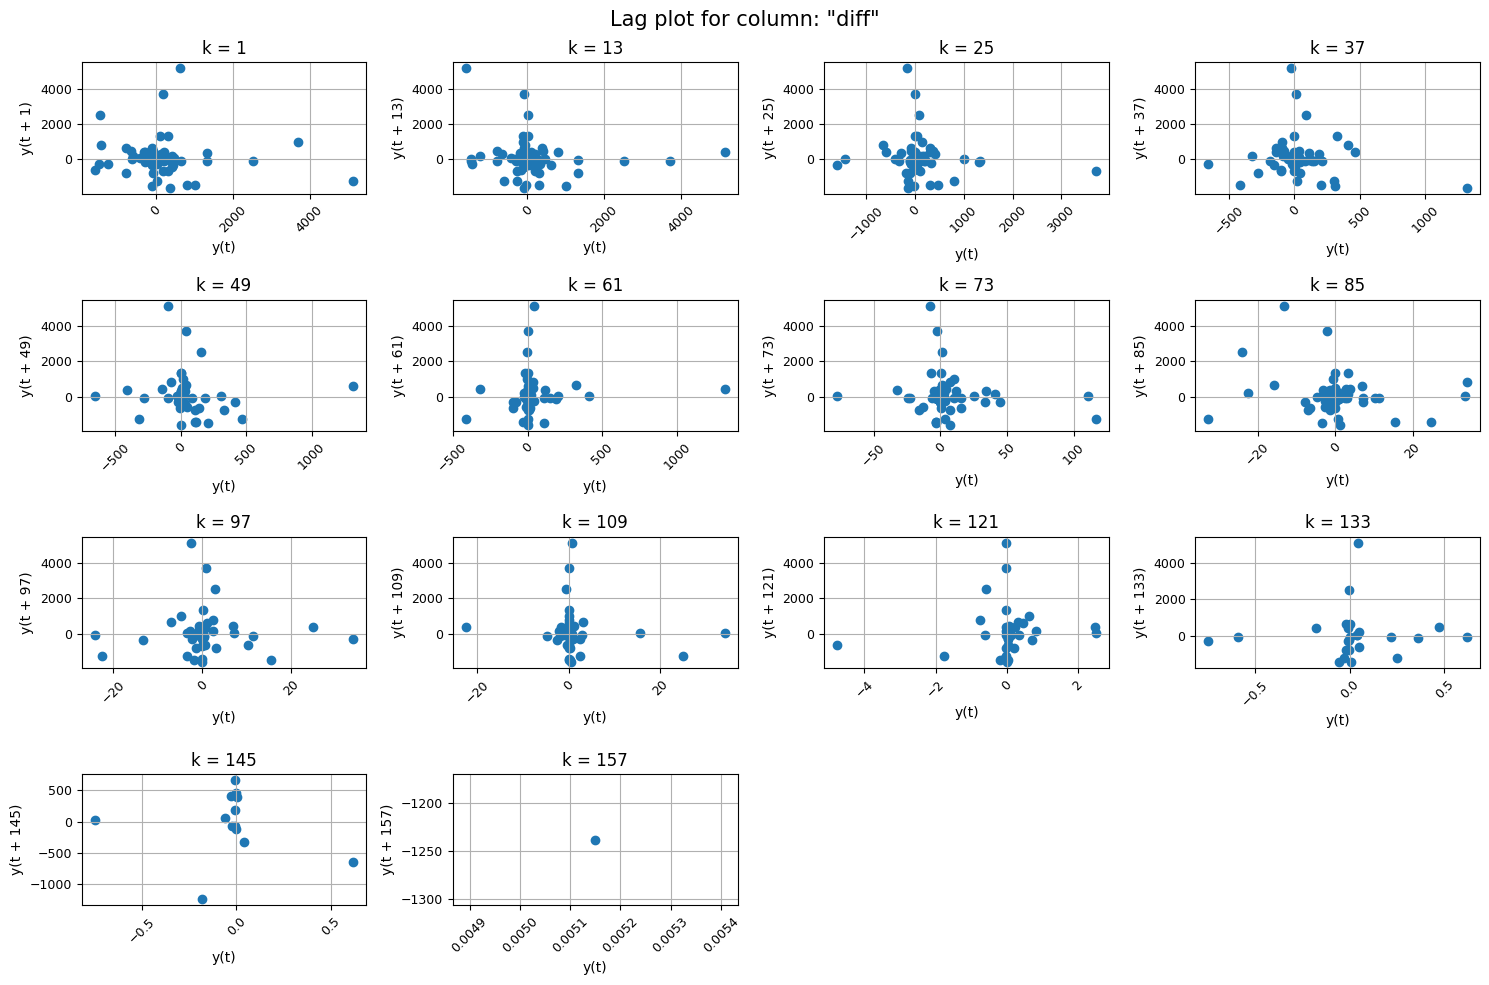

In [31]:
lagPlots(df['diff'],'diff')

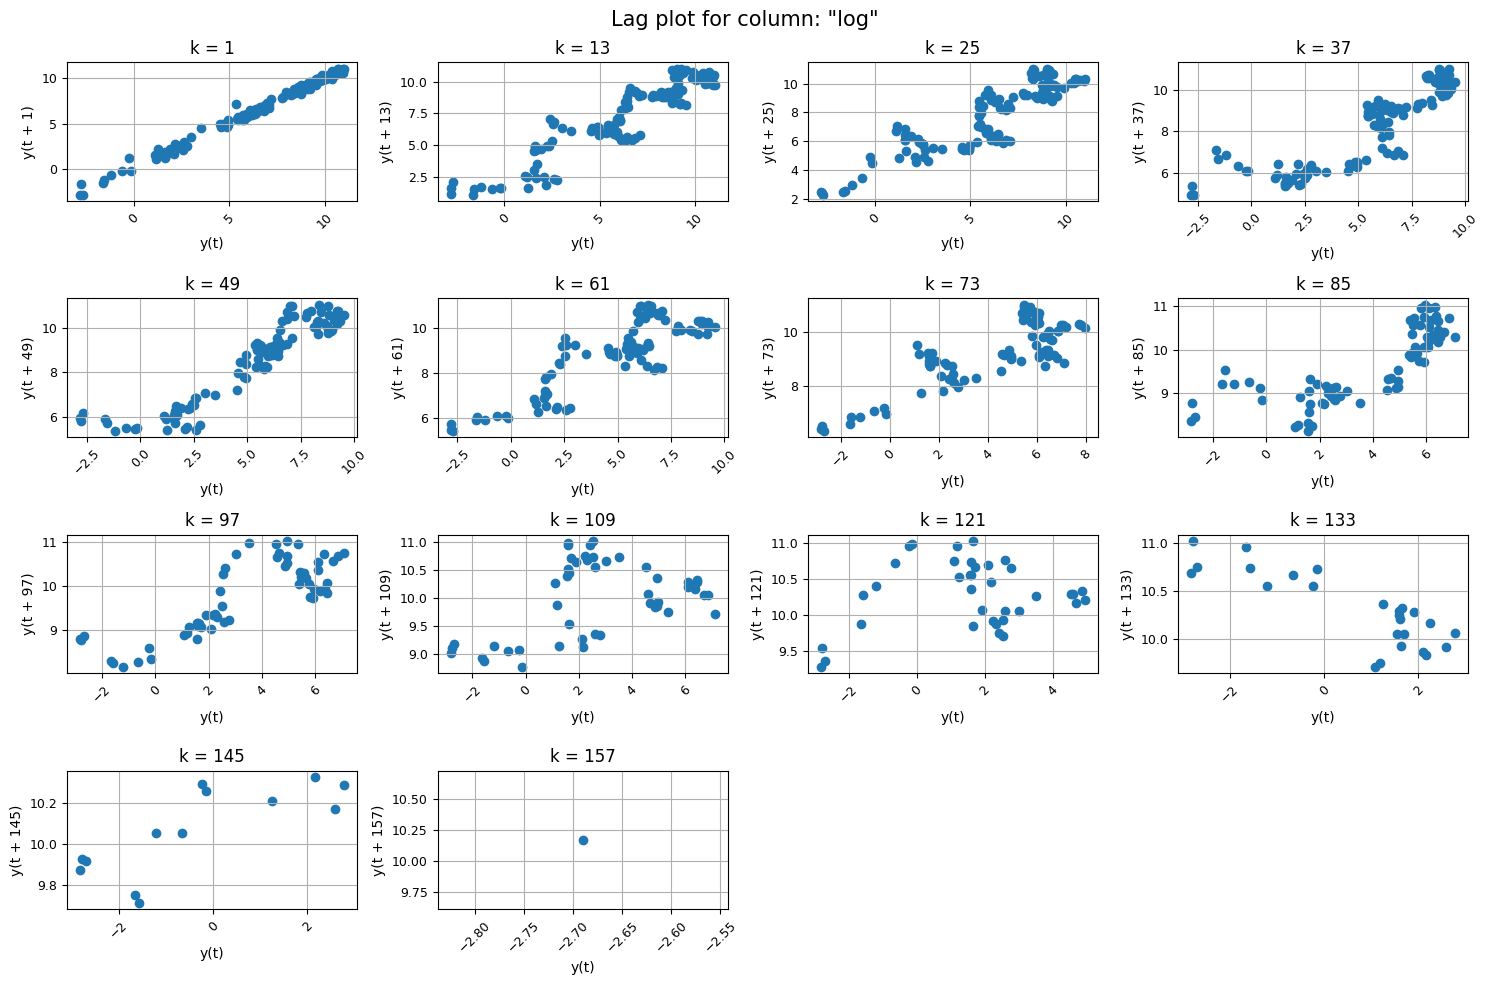

In [10]:
lagPlots(df['log'],'log')

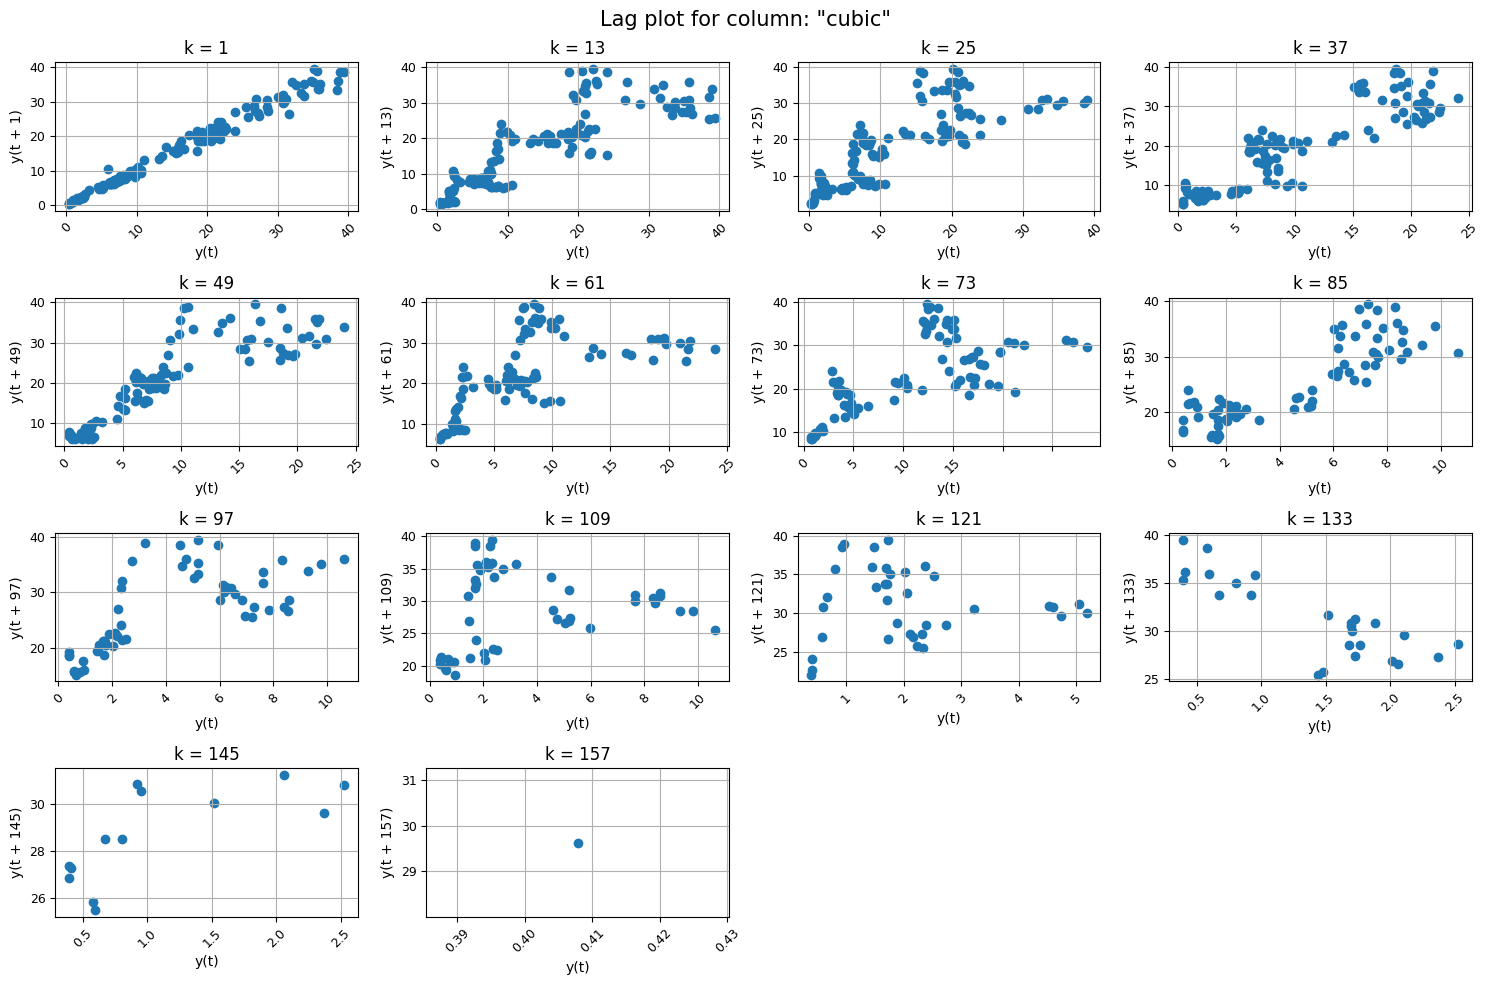

In [11]:
lagPlots(df['cubic'],'cubic')

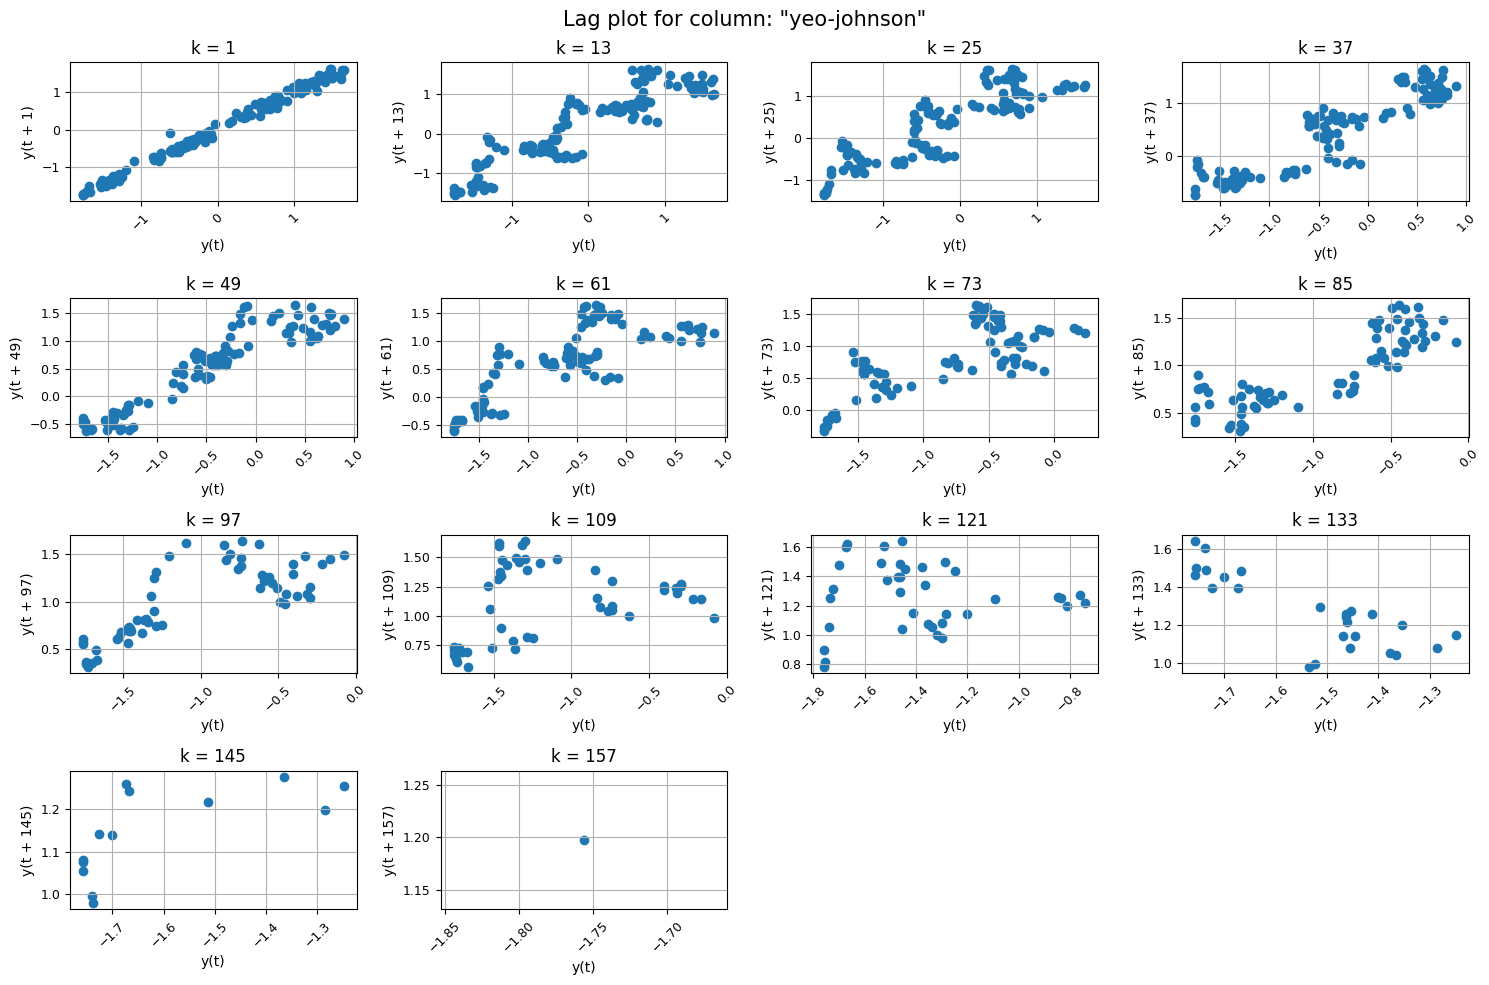

In [12]:
lagPlots(df['yeo-johnson'],'yeo-johnson')

Las gráficas muestran patrones de relación lineal en los gráficos de retardo, lo que sugiere que los datos no son aleatorios.

*The graphs display linear relationship patterns in the lag plots, suggesting that the data is not random.*

# Algunos conceptos básicos sobre autocorrelación/ *Some basic concepts about autocorrelation*



1.  La autocorrelación representa el grado de similitud entre una serie temporal dada y una versión retrasada de sí misma en intervalos de tiempo sucesivos.
2.   La autocorrelación mide la relación entre el valor actual de una variable y sus valores pasados.
3.   Una autocorrelación de +1 representa una correlación positiva perfecta, mientras que una autocorrelación de -1 representa una correlación negativa perfecta.










*1.   Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.*

*2.   Autocorrelation measures the relationship between a variable's current value and its past values.*

*3. An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.*



¿Por qué es útil?/ *Why useful?*



1.   Nos ayuda a descubrir patrones ocultos en nuestros datos y a seleccionar los métodos de pronóstico adecuados.
2.   Ayuda a identificar la estacionalidad en nuestros datos de series temporales.
3.   El análisis de la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) en conjunto es necesario para seleccionar el modelo ARIMA adecuado para cualquier predicción de series temporales.



*1. Help us uncover hidden patterns in our data and help us select the correct forecasting methods.*

*2. Help identify seasonality in our time series data.*

*3. Analyzing the autocorrelation function (ACF) and partial autocorrelation function (PACF) in conjunction is necessary for selecting the appropriate ARIMA model for any time series prediction.*


¿Alguna suposición realizada por el ACF?/ *Any assumption made by ACF ?*

Estacionariedad débil, lo que significa que no hay cambios sistemáticos en la media, varianza ni fluctuaciones sistemáticas.

Por lo tanto, al realizar el ACF, es recomendable eliminar cualquier tendencia presente en los datos y asegurarse de que los datos sean estacionarios.

*Weak stationary — meaning no systematic change in the mean, variance, and no systematic fluctuation.*

*So when performing ACF it is advisable to remove any trend present in the data and to make sure the data is stationary.*

## Autocorrelación simple/ *Simple autocorrelation*

Para comprobar de mejor manera la autocorrelación, representamos las funciones de autocorrelación simple y parcial de los residuos.

*To better assess autocorrelation, we represent the simple and partial autocorrelation functions of the residuals.*

In [23]:
def ACF(df, column):
  # autocorrelation function plot
  sm.graphics.tsa.plot_acf(df, lags=157, alpha=0.05)
  plt.ylabel("Autocorrelation Coefficient")
  plt.title(f"Autocorrelation of column: '{column}'",fontsize = 15)
  plt.xlabel("Lag")
  plt.tight_layout()
  plt.show()

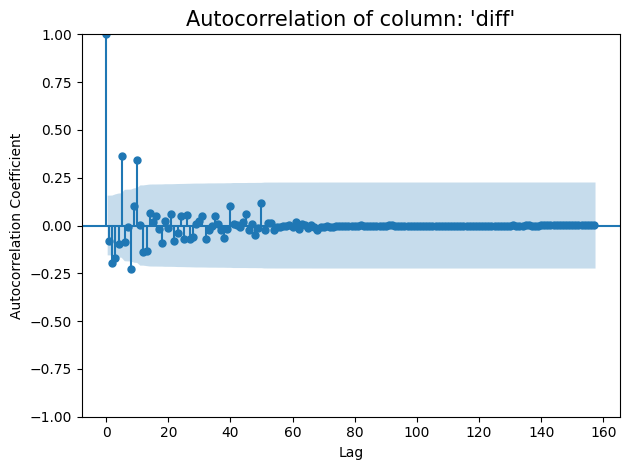

In [32]:
ACF(df['diff'], 'diff')

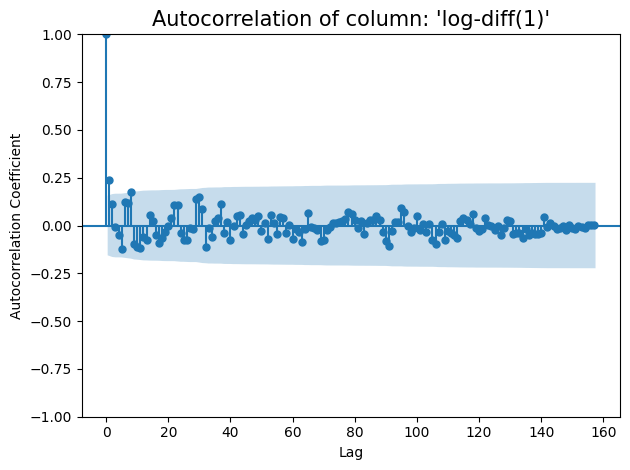

In [40]:
logDiff= df['log'].diff().fillna(method ='bfill')
ACF(logDiff,'log-diff(1)')

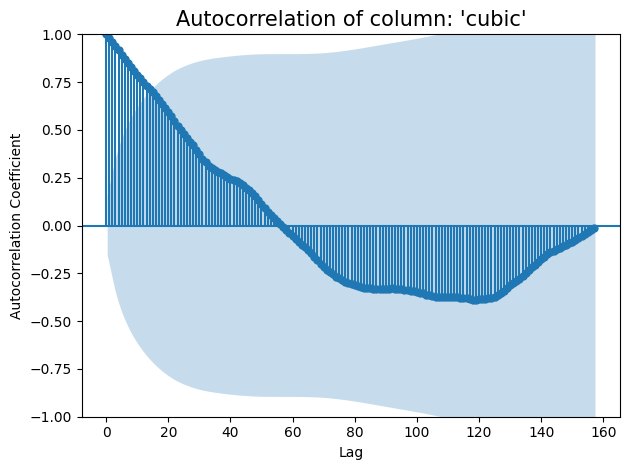

In [26]:
ACF(df['cubic'],'cubic')

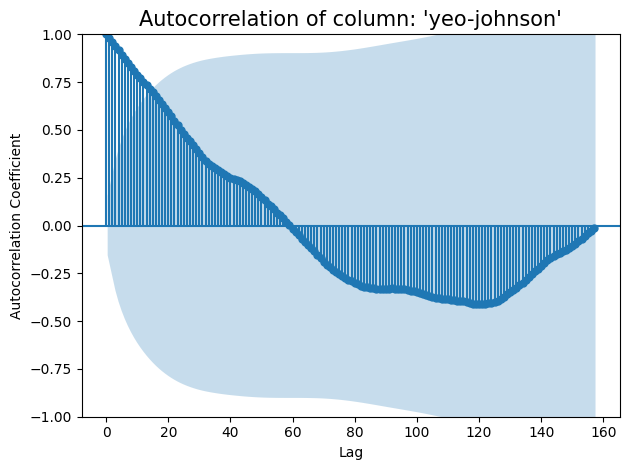

In [27]:
ACF(df['yeo-johnson'],'yeo-johnson')

Comparemos los gráficos con tendencia y aquellos que son estacionarios. Cuando hay tendencias presentes en una serie de tiempo, los retardos más cortos suelen tener correlaciones positivas grandes porque las observaciones más cercanas en el tiempo tienden a tener valores similares. Las correlaciones disminuyen lentamente a medida que aumentan los retardos.
En los gráficos de las transformación cúbica y "Jhonson", las autocorrelaciones disminuyen lentamente, por lo tanto, los primeros retardos son significativos.
En las gráficas de diferencias (tanto sobre la serie original como sobre la logarítmica) vemos algunos picos que podrían inducir algún patrón estacional, sin embargo son pocos los que superan el nivel de significancia del 5%.


*Let's compare the plots with trends to those that are stationary. When trends are present in a time series, shorter lags typically have large positive correlations because observations closer in time tend to have similar values. The correlations taper off slowly as the lags increase. In the plots of the cubic and Johnson transformations, autocorrelations decrease slowly, hence the first lags are significant. In the differencing plots (both on the original series and the logarithmic one), we see some spikes that might suggest some seasonal pattern, however, very few of them surpass the 5% significance level.*

## Autocorrelación parcial/ *Partial autocorrelation*

In [34]:
def PACF(df, column):
  pacf_values = sm.tsa.pacf(df, nlags=20, method='ols')
  plt.figure(figsize=(12, 6))
  plot_pacf(df, lags=20)
  plt.xlabel('Lag')
  plt.ylabel('Autocorrelation coefficient')
  plt.title(f'Partial autocorrelation of column: "{column}"')
  plt.show()


<Figure size 1200x600 with 0 Axes>

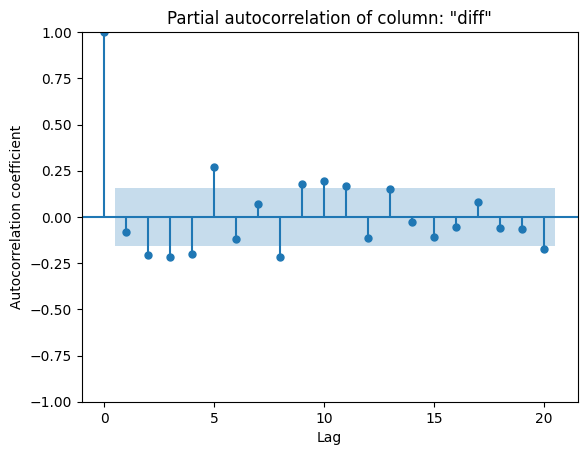

<Figure size 1200x600 with 0 Axes>

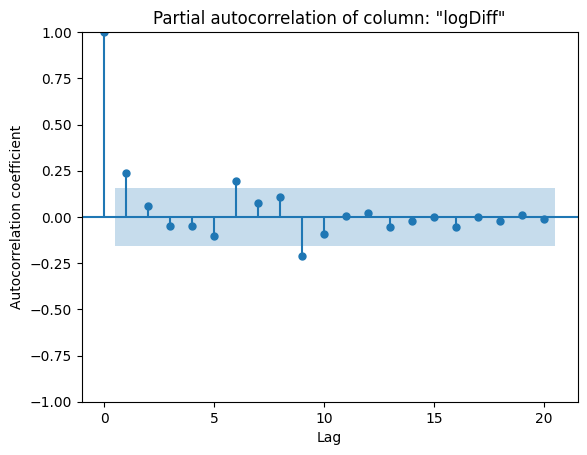

<Figure size 1200x600 with 0 Axes>

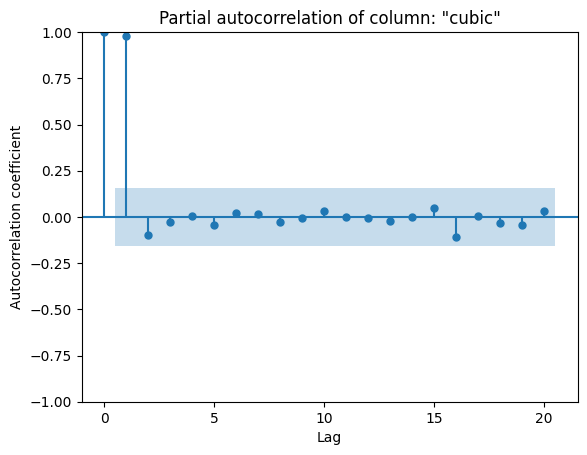

<Figure size 1200x600 with 0 Axes>

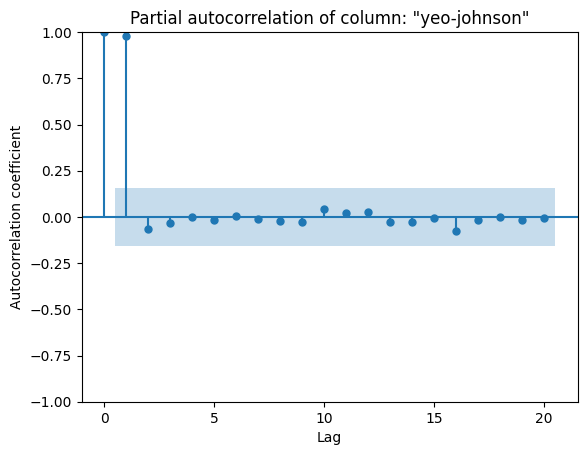

In [42]:
PACF(df['diff'], 'diff')
PACF(logDiff, 'logDiff')
PACF(df['cubic'], 'cubic')
PACF(df['yeo-johnson'], 'yeo-johnson')

El gráfico de la transformación por la diferencia (de 1), es el único de todas las transformaciones que no tiene una tendencia. Por eso es el único que nos devuelve alguna información relevante. Aún así, no encontramos ningún patrón de estacionalidad.

*The plot of the first-order difference transformation is the only one among all the transformations that does not show a trend. Therefore, it is the only one that provides some relevant information. Nevertheless, we have not identified any seasonality patterns in the data.*

## Conclusión/ *Conclusion*

Las gráficas nos muestran que si bien estamos ante una serie temporal dificil de predecir, no nos encontramos ante simples datos aleatorios: para datos aleatorios, las autocorrelaciones deben estar cerca de cero para todos los retardos. Los analistas también se refieren a esta condición como ruido blanco. Los datos no aleatorios, por otra parte, tienen al menos un retardo significativo.
En cuanto a la estacionalidad hemos comprobado que no existe evidencia suficiente para admitir esta hipótesis, por lo tanto, concluimos que los datos no presentan estacionalidad en ninguna de sus transformaciones.


*The graphs show us that although we are dealing with a challenging time series to predict, we are not dealing with simple random data. For random data, autocorrelations should be near zero for all lags. Analysts also refer to this condition as white noise. Non-random data, on the other hand, have at least one significant lag. As for seasonality, we have found that there is not enough evidence to support this hypothesis; therefore, we conclude that the data do not exhibit seasonality in any of its transformations.*